In [12]:
import cv2
from PIL import Image
import cv2
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np

In [36]:
def histogram_equalization(input_image):
    # Konversi gambar ke grayscale jika belum grayscale
    if len(input_image.shape) == 3:
        gray = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
    else:
        gray = input_image
    
    # Melakukan histogram equalization
    equalized_image = cv2.equalizeHist(gray)
    
    return equalized_image


In [22]:
# Fungsi Histogram Specification
def histogram_specification(input_image, reference_image):
    # Split gambar menjadi saluran RGB
    b, g, r = cv2.split(input_image)

    # Hitung histogram untuk setiap saluran RGB
    hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])
    hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
    hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])

    # Normalisasi histogram
    hist_b /= hist_b.sum()
    hist_g /= hist_g.sum()
    hist_r /= hist_r.sum()

    # Split gambar referensi menjadi saluran RGB
    ref_b, ref_g, ref_r = cv2.split(reference_image)

    # Hitung histogram untuk setiap saluran RGB pada gambar referensi
    hist_ref_b = cv2.calcHist([ref_b], [0], None, [256], [0, 256])
    hist_ref_g = cv2.calcHist([ref_g], [0], None, [256], [0, 256])
    hist_ref_r = cv2.calcHist([ref_r], [0], None, [256], [0, 256])

    # Normalisasi histogram referensi
    hist_ref_b /= hist_ref_b.sum()
    hist_ref_g /= hist_ref_g.sum()
    hist_ref_r /= hist_ref_r.sum()

    # Hitung fungsi kumulatif (CDF) dari histogram input dan referensi
    cdf_b = hist_b.cumsum()
    cdf_g = hist_g.cumsum()
    cdf_r = hist_r.cumsum()

    cdf_ref_b = hist_ref_b.cumsum()
    cdf_ref_g = hist_ref_g.cumsum()
    cdf_ref_r = hist_ref_r.cumsum()

    # Membuat pemetaan pixel baru untuk masing-masing saluran RGB
    lut_b = np.interp(cdf_b, cdf_ref_b, np.arange(256))
    lut_g = np.interp(cdf_g, cdf_ref_g, np.arange(256))
    lut_r = np.interp(cdf_r, cdf_ref_r, np.arange(256))

    # Aplikasikan pemetaan ke gambar input
    output_b = cv2.LUT(b, lut_b.astype('uint8'))
    output_g = cv2.LUT(g, lut_g.astype('uint8'))
    output_r = cv2.LUT(r, lut_r.astype('uint8'))

    # Gabungkan kembali saluran RGB menjadi gambar output
    output_image = cv2.merge((output_b, output_g, output_r))

    return output_image

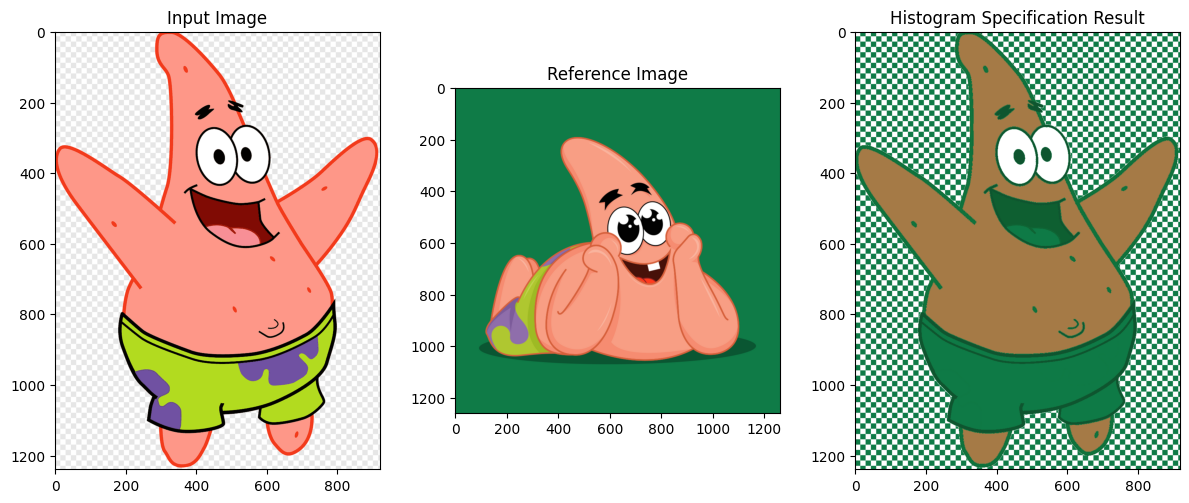

In [32]:
# Baca gambar input dan referensi
input_image = cv2.imread('patrick3.png')
reference_image = cv2.imread('patrick.png')

# Terapkan Histogram Specification
output_specification = histogram_specification(input_image, reference_image)

# Menampilkan gambar hasil
plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.title('Input Image')
plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))

plt.subplot(132)
plt.title('Reference Image')
plt.imshow(cv2.cvtColor(reference_image, cv2.COLOR_BGR2RGB))

plt.subplot(133)
plt.title('Histogram Specification Result')
plt.imshow(cv2.cvtColor(output_specification, cv2.COLOR_BGR2RGB))

plt.tight_layout()
plt.show()

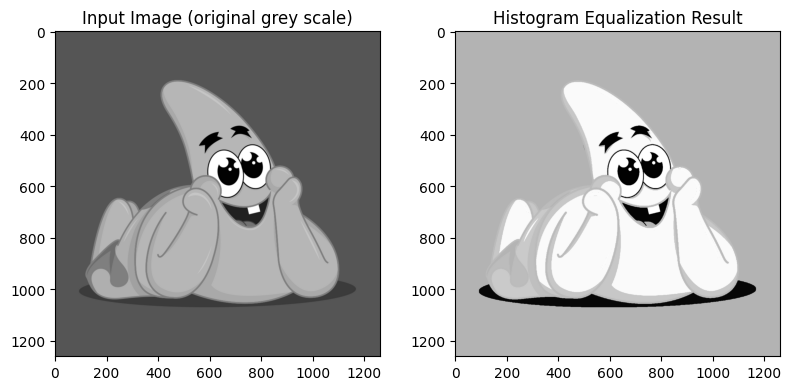

In [39]:
# Baca gambar input dan referensi
input_image = cv2.imread('patrick.png')
image_grey = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

# Terapkan Histogram Equalization
output_equalization = histogram_equalization(input_image)

# Menampilkan gambar hasil
plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.title('Input Image (original grey scale)')
plt.imshow(cv2.cvtColor(image_grey, cv2.COLOR_BGR2RGB))

plt.subplot(132)
plt.title('Histogram Equalization Result')
plt.imshow(cv2.cvtColor(output_equalization, cv2.COLOR_BGR2RGB))

plt.tight_layout()
plt.show()


In [ ]:
# Penjelesan

# - Histogram Equalization bertujuan meningkatkan kontras gambar dengan distribusi intensitas yang lebih merata di seluruh rentang.
# - Histogram Specification bertujuan mencocokkan distribusi intensitas piksel dalam gambar dengan distribusi intensitas yang diinginkan 
#   dari citra referensi.

# Equalization menciptakan kontras yang lebih baik, sedangkan Specification mempertahankan karakteristik citra referensi.